# Лабораторная работа №4 (Laboratory work 4)
### Задача класстеризации - исследование красного вина (Clustering task - Red Wine Research)

--------------------------------------
### Эпилог (Epilogue):
#### Набор данных относится к красному варианту португальского вина Vinho Verde. Из-за конфиденциальности и логистических проблем доступны только физико-химические (входные данные) и "качество" вина. Также учитываем, что нет дополнительных данных, т.е. о сортах винограда, марке вина, отпускной цене вина и т.д. (The dataset refers to the red variant of the Portuguese wine Vinho Verde. Due to confidentiality and logistical issues, only the physico-chemical (input data) and "quality" of the wine are available. We also take into consideration that there is no additional data, i.e. about grape varieties, wine brand, selling price of wine, etc.)
### Цель (Goal):
#### Данные не стандартизированы, не сбалансированы. Нужно научиться классифицировать данные и сравнить методы: задачу классификации и её после метода главных компонент, сделать вывод о лучшей классификации. (The data is not standardized, not balanced. It is necessary to learn how to classify data and compare methods: the classification task and its main components after the method, to conclude about the best classification.)

-------------------------------------
## Задание 1-2 (Task 1-2)
#### Загрузка и анализ исходных данных (Downloading and analyzing input data)

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
df.dtypes

FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
PH                    float64
Sulphates             float64
Alcohol               float64
Class                   int64
dtype: object

## Задание 3
#### Стандартизация

In [27]:
from sklearn import preprocessing
import numpy as np

In [28]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']

In [29]:
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df.dropna()
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


## Задание 4
#### Выполните расчёт главных компонент. Преобразуйте набор к новой системе
#### координат и отсеките те координаты, которым соответствует собственные значения,
#### меньшие 1.

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
table_pca = pca.fit_transform(df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
explained_variance = pca.explained_variance_
print(explained_variance)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]


In [31]:
df=df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']]
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class
0,-0.528360,0.961877,-1.391472,-0.453218,5
1,-0.298547,1.967442,-1.391472,0.043416,5
2,-0.298547,1.297065,-1.186070,-0.169427,5
3,1.654856,-1.384443,1.484154,-0.453218,6
4,-0.528360,0.961877,-1.391472,-0.453218,5
...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,5
1595,-1.390155,0.123905,-0.877968,-0.240375,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,6
1597,-1.390155,0.654620,-0.775267,-0.382271,5


## Задание 5
#### Выполните кластеризацию данных с помощью метода Affinity Propagation. Сравните
#### число кластеров с реальным.

In [32]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


In [42]:
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference = -100, damping =0.7).fit(
df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar']])
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print(labels)
print(cluster_centers_indices)

[1 3 1 ... 1 1 5]
[ 274  297  338  638  813  952  972 1038 1152 1476]


В результате применения метода получили __ кластеров. Количество реальных кластеров равно 6, что (не) совпадает с полученным.

## Задание 6
#### Используя метод силуэта, определите оптимальное число кластеров для
#### кластеризации методами DBSCAN и Spectral Clustering. Сравните с реальным
#### числом кластеров.

In [34]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
silhouette = []
max = 0
rg = range(2, 11)
for k in rg:
    sc = SpectralClustering(n_clusters = k, affinity = 'rbf').fit(df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar']])
    preds = sc.labels_
    silhouette.append(silhouette_score(df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar']],preds))

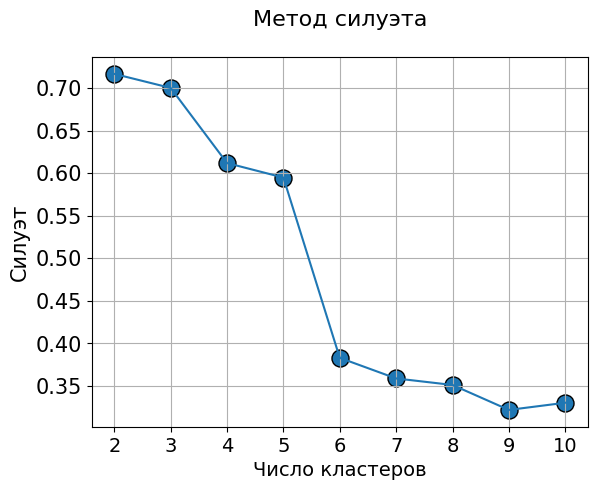

In [37]:
plt.title("Метод силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette)
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

С помощью метода опредилили, что оптимальное число кластеров равно __. В свою очередь количество реальных кластеров - 6, что (не) совпадает с полученным.